使用LinearRegression模型的均方误差为: 27.28668926833176
使用交叉验证的均方误差为: 34.53965953999338
[31.36234122]


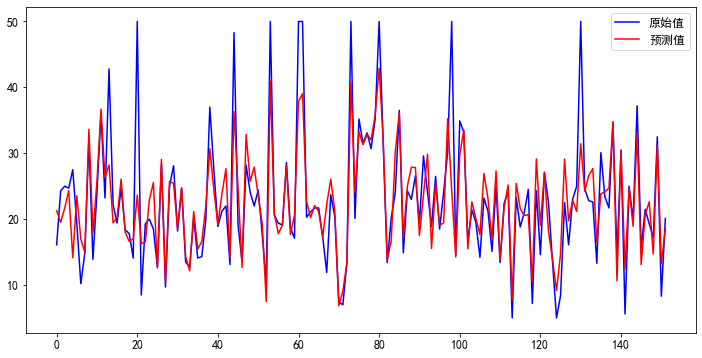

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn import svm
import joblib
clf = svm.SVC()
#导入波士顿房价数据
boston=load_boston()
x=boston['data']##获得数据集中的输入
y=boston['target']##获得数据集中的输出，即标签(也就是类别)
names=boston['feature_names']##获取数据集的属性

# 将数据分成训练集（0.7）和测试集（0.3）
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=125)

#建立线性回归模型,并将训练数据传入开始训练
clf=LinearRegression().fit(x_train,y_train)
#预测测试集数据
y_pred=clf.predict(x_test)

#绘制对比折线图，观察回归效果
#设置绘图参数
fig=plt.figure(figsize=(12,6))
plt.rcParams['font.family']="sans-serif"
plt.rcParams['font.sans-serif']="SimHei"
plt.rcParams['font.size']=12
plt.rcParams['axes.unicode_minus']=False
#绘制图线
plt.plot(range(y_test.shape[0]),y_test,color='blue',linewidth=1.5)
plt.plot(range(y_test.shape[0]),y_pred,color='red',linewidth=1.5)
plt.legend(['原始值','预测值'])


#对于回归模型的评价我们一般会用MSE(均方误差)
print("使用LinearRegression模型的均方误差为:",mean_squared_error(y_test, y_pred))

#同时采用交叉验证的方法进行评价
#将数据集分为10组(一般均分)，然后每次选择一组作为验证集，其余九组作为训练集。
predicted = cross_val_predict(clf,x,y,cv=10)
print("使用交叉验证的均方误差为:",mean_squared_error(y, predicted))

#保存Model(注:save文件夹要预先建立，否则会报错)
joblib.dump(clf, 'save/clf.pkl')

#读取Model
clf3 = joblib.load('save/clf.pkl')

#测试读取后的Model
print(clf3.predict(x_train[0:1]))